# Workshop 1: Welcome to Machine Learning! 🚀 #

- **When**: Monday Week 3, 17:00 - 18:30 
- **Where**: AT 5.04
- **Contact**: hello@edinburghai.org
- **Credits**: This notebook is created by EdinburghAI for use in its workshops. If you plan to use it, please credit us. 
- **P.S.**: All data is FAKE!

## Today
- Use **linear regression**📈 and **decision trees**🌲 to learn linear relationships and to classify
- Learn about fully-connected **neural networks** 🧠 using Python 🐍 and [Pytorch](https://pytorch.org/).
- Train your first neural net 🧑‍🎓

Let's get started! 💯

# Instructions

This is a Jupyter notebook. It contains cells. There are 2 kinds of cells - markdown and Python. Markdown cells are like this one, and are just there to give you information. Python cells run code. You can run a cell with `Ctrl + Enter` or run a cell and move the next one with `Shift + Enter`. Try running the cell below.

In [27]:
print('Ctrl + Enter runs this cell!')
output = 'The last line of a cell is printed by default'
output

Ctrl + Enter runs this cell!


'The last line of a cell is printed by default'

#### What YOU Need To Do 

- There are places to write code, indicated by `...` and a comment with `TODO:` in a python cell. You should fill these in or nothing will work! If you have any questions, just ask one of the EdinburghAI people :)

- There are points to stop and think indicated by **Think🤔**. Please stop, think, maybe write an answer, and discuss with those around you. 

- There are also questions labelled **Extension😈**. These are more optional, and are for those of you who might have done some similar stuff before. Feel free to have a think about these questions though!

Good luck!

# What is Machine Learning? 🤖

Supppose you're in charge of the Google internship hiring team. You've been tasked with creating an automated system that decides who to give internships to. You have access to their grades and their CVs. Think - how would you do it? Maybe you could write a function that assigns some score to their average grade, and adds on some extra points if they were part of programming club. But what number? And how much should you add on?

Machine learning provides a way for the machine **to find this function by itself from data**. The machine chooses the function by analysing previous successful and unsuccessful intern hires, and deciding what was most important in those decisions.

**Think🤔**: Is this a good system for deciding intern hires? Why or why not?

This is all super high-level and intuititve, so let's get building to see it in action. There are loads of ways machines can learn from data. First up, we're going to cover two methods called Linear Regression and Decision Trees.

# Linear Regression #

Linear regression is a fancy way of saying that you want to draw a straight line. Remember in school science class when you plotted your data and drew your line of best fit? The machine can draw this straight line for you. If you want to see how, you can google 'Ordinary Least Squares Regression' - but we'll skip the details here. 

**Think🤔**: How you would design an algorithm that draws a straight line through some points? By *drawing* a straight line, I mean deciding on what $m$ and $b$ are, in your trusty straight line equation: $y=mx + b$. Describe an algorithm to someone sitting near you!

This isn't very advanced, but it is Machine Learning. Understanding what's going on here is crucial to understanding what's actually happening with more complicated machine learning methods. You give the machine some data points and a rough idea what the function should look like, and the machine decides on the detail. This is fundamentally the same as any ML algorithm. 

Let's see it in action💪. To do this, we need some data! Let's load some data about units of alcohol consumed per week and # of Big Cheese attendances per year. Each data point is a (fake) student.

In [28]:
# First let's move to the input directory so we can easily import the data
# If you don't understand this command, don't worry! It's not at all important.
%cd /kaggle/input/edinburghai-workshop1

# Then we load some (FAKE) data in from a csv file using a package called pandas
import pandas as pd

# Load the data from the csv file and display the first few rows
bigcheese_data = pd.read_csv('bigcheese.csv')
bigcheese_data.head()

,Units of alcohol per week,Big cheese attendances per year
0,6.641469,6.0
1,8.511864,5.0
2,2.529244,2.0
3,5.009038,3.0
4,13.184376,10.0


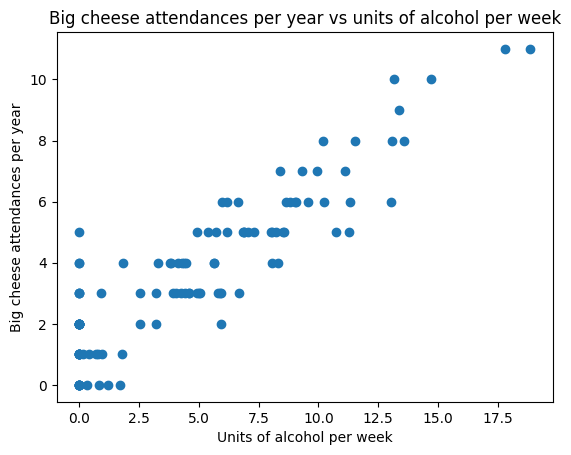

In [29]:
# Next we can plot the data using matplotlib
import matplotlib.pyplot as plt
plt.scatter(data=bigcheese_data, x='Units of alcohol per week', y='Big cheese attendances per year')
plt.xlabel('Units of alcohol per week')
plt.ylabel('Big cheese attendances per year')
plt.title('Big cheese attendances per year vs units of alcohol per week')
plt.show()

Now we can fit a linear regression model to the data. We can use the `LinearRegression` class from the [sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

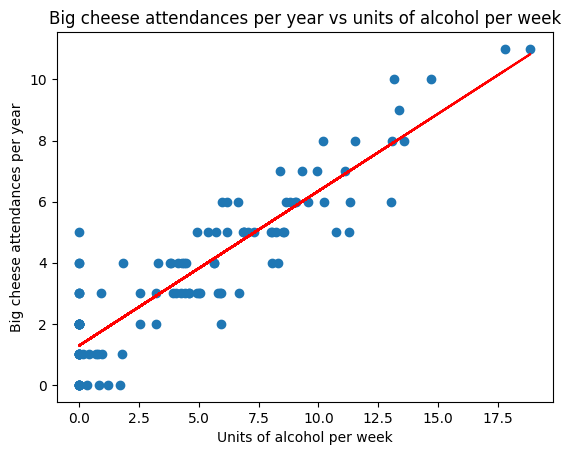

In [30]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# We can 'fit' model to the data. This means that we are finding the best line that cuts through the middle of the data.
linear_model.fit(bigcheese_data[['Units of alcohol per week']], bigcheese_data['Big cheese attendances per year'])

# And finally we can plot the data and the line that the model has found
plt.scatter(data=bigcheese_data, x='Units of alcohol per week', y='Big cheese attendances per year')
plt.plot(bigcheese_data['Units of alcohol per week'], linear_model.predict(bigcheese_data[['Units of alcohol per week']]), color='red')
plt.xlabel('Units of alcohol per week')
plt.ylabel('Big cheese attendances per year')
plt.title('Big cheese attendances per year vs units of alcohol per week')
plt.show()

In [31]:
# We can look at our straight line equation using the coef_[0] and model.intercept_ attributes of our model. Fill in the blanks below! 
m = round(linear_model.coef_[0], 2)
c = round(linear_model.intercept_, 2)
print(f'y = {m}x + {c}')

y = 0.51x + 1.29


**Think and Discuss:** Why do you think `model.coef_` is a list?

*Hint: Imagine you also had information on students' average bedtimes on a Saturday night and wanted to use this in your model.*

Now let's predict how many big cheeses per year someone attends from their alcohol consumption using `model.predict()`.

In [32]:
input_alchol_per_week = 10

prediction_big_cheeses_per_year = linear_model.predict([[input_alchol_per_week]])[0]
print(f'Predicted big cheeses per year: {round(prediction_big_cheeses_per_year, 2)}')

Predicted big cheeses per year: 6.35


/Users/pierrelardet/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Try messing around with the prediction and answer the following questions with those around you.

What happens if you input 0 units per week? What happens if you input 50 units per week? 

**Think🤔**: Do these make sense? How many big cheese are there per year? How might you correct your model to be more realistic?

*Hint: There's a big cheese every week of the academic year*

## Extension 😈

Perhaps you think this is boring 😴 because we can only genrerate straight lines. To see why linear regression is actually more powerful than you think, try the next exercise.

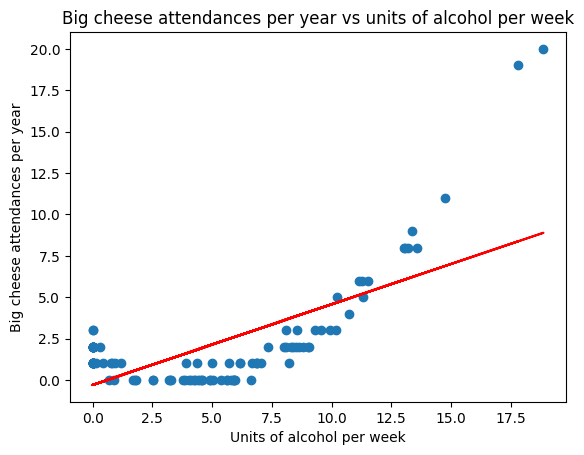

In [33]:
# Let's get some new data
big_cheese_quadratic = pd.read_csv('bigcheese-quadratic.csv')

# And plot it with our linear model fitted to the new data
linear_model.fit(big_cheese_quadratic[['Units of alcohol per week']], big_cheese_quadratic['Big cheese attendances per year'])
plt.scatter(data=big_cheese_quadratic, x='Units of alcohol per week', y='Big cheese attendances per year')
plt.plot(big_cheese_quadratic['Units of alcohol per week'], linear_model.predict(big_cheese_quadratic[['Units of alcohol per week']]), color='red')
plt.xlabel('Units of alcohol per week')
plt.ylabel('Big cheese attendances per year')
plt.title('Big cheese attendances per year vs units of alcohol per week')
plt.show()

This doesn't look as good as last time. **Think🤔**: How could you quantify this? How would you measure how 'good' the line is? 

[*Hint*](https://medium.com/@TheDataScience-ProF/demystifying-rmse-your-guide-to-understanding-root-mean-squared-error-379e41dccfd9)

Maybe you can spot that this looks more like a quadratic relationship. **Think🤔**: Do you think you'd be able to use the same linear model to fit this relationship? If so, how?

*Hint: Currently you're just passing $x$ to Linear Regression. If the relationship is quadratic, what might you pass to the Linear Regression instead?*. 

Try it below!

/Users/pierrelardet/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


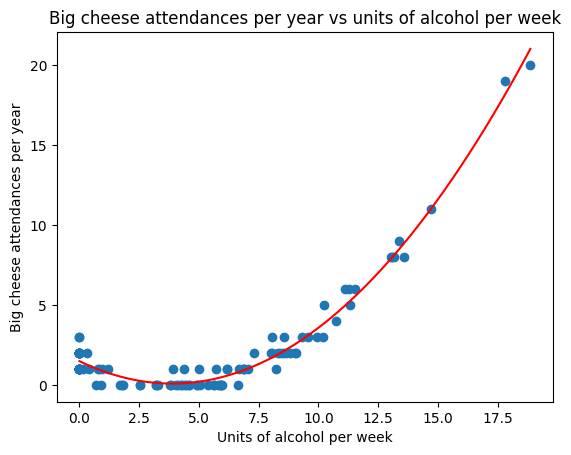

In [34]:
import numpy as np

# We can add a quadratic term to our model by creating a new column in our data that is the square of the 'Units of alcohol per week' column
new_data['Units of alcohol per week squared'] = new_data['Units of alcohol per week'] ** 2

# And then we can fit a new model to the data with the quadratic term included
linear_model.fit(new_data[['Units of alcohol per week', 'Units of alcohol per week squared']], new_data['Big cheese attendances per year'])

# And plot the data with the new model
# Don't worry too much about the code below, it's just to make the plot look nicer
plt.scatter(data=new_data, x='Units of alcohol per week', y='Big cheese attendances per year')
x_smooth = np.linspace(new_data['Units of alcohol per week'].min(), new_data['Units of alcohol per week'].max(), 100)
x_smooth_squared = x_smooth ** 2
x_smooth_data = np.column_stack([x_smooth, x_smooth_squared])
y_smooth = linear_model.predict(x_smooth_data)
plt.plot(x_smooth, y_smooth, color='red', label='Quadratic fit')
plt.xlabel('Units of alcohol per week')
plt.ylabel('Big cheese attendances per year')
plt.title('Big cheese attendances per year vs units of alcohol per week')
plt.show()

That looks a bit better! 

Can you see that if you messed around with whether we have an `x**2` or `x**3` term etc, or more complicated functions like `sin(x)` AND with multiple different inputs AND even with interactions between these inputs, we can actually do a lot with linear regression?

Go google 'radial basis functions' or 'sigmoid basis functions' to learn more. Combined with linear regresion, it's powerful stuff!

## Decision Trees

We're going to take the Google internship hiring example for this one.

If you program a system by hand, you might make rules like: 'The grade must be above 70%'. Or 'If their grade is high enough, they must also have been part of programming club'. You could implement this as a bunch of if statements. But why 70%? And should it be programming club, or should you look at how many previous internships they've done? This is where Decision Trees come in. They make these decisions for you.

**How it works**: On a high-level, what a decision tree does is look at the data and see which splits it can make to most neatly divide the people into who got an internship and who didn't. If you want to understand more, [here's a 4 minute video.](https://www.youtube.com/watch?v=JcI5E2Ng6r4)

Let's load some internship data and have a go. Each data point is a student, with their average grade and whether or not they got hired.

In [35]:
# Load some data
data = pd.read_csv('googleinternship_simple.csv')
data.head()

,Average grade,Hired
0,63.708853,False
1,56.313959,False
2,39.707751,False
3,49.468853,False
4,66.760647,False


Before running our model, let's introduce the idea of *training* and *testing*. Your model is like a student. You can give it exercises to practice, but you also want to know how good it is. So, you can give it a test with similar questions to what it's previously seen, but not exactly the same, because you don't want it just to memorise.

To do this, we first split our data into train and test. We then train our model using the train data, and test our model using the *unseen* test data. We can then decide how good our model was on the test data. 

Let's split our data using `sklearn`'s `train_test_split`, with a ratio of 20% testing data. This number is arbitrary, but generally we test using between 10 and 40% of the data depending on how much data is available and other factors.

We'll also introduce the convention of using `X` as input to the model, and `y` as the output.

In [36]:
from sklearn.model_selection import train_test_split

X = data[['Average grade']]
y = data['Hired']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Think🤔**: What is the type of `X` and `y`? How big are they? Therefore, why do you think we have a capital `X` and lower case `y`?

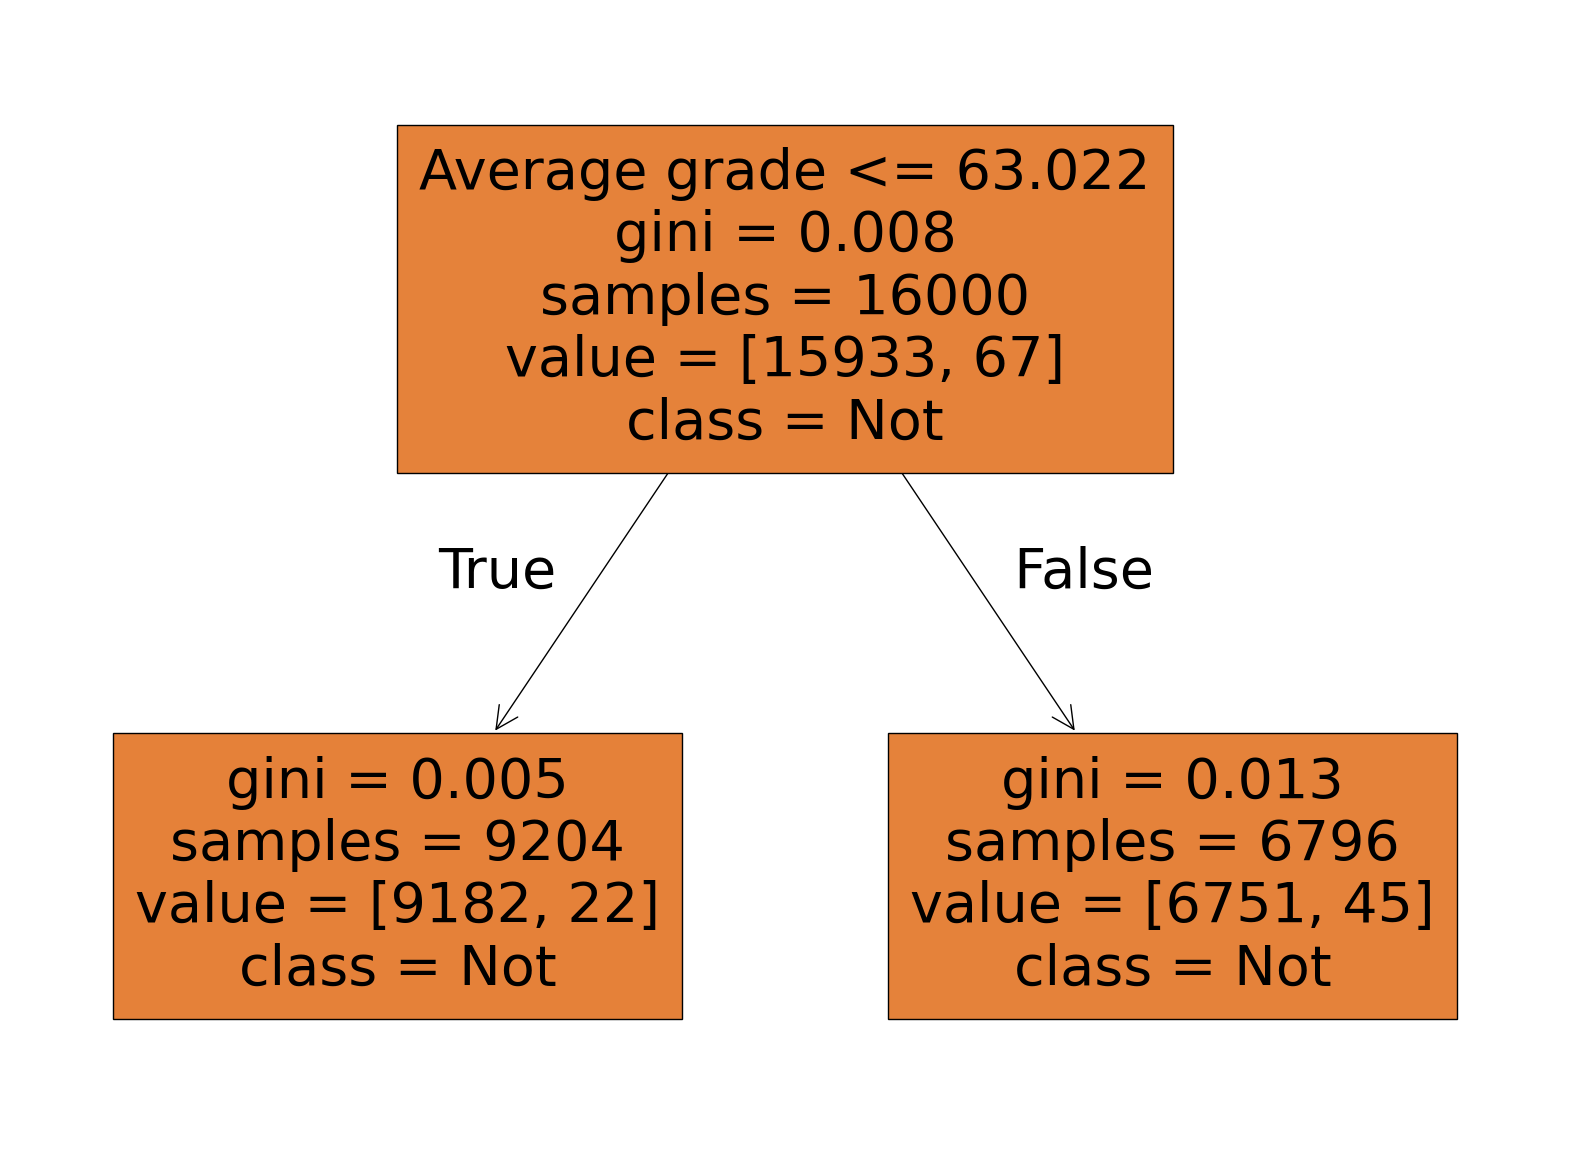

In [37]:
from sklearn.tree import DecisionTreeClassifier

# We can create a decision tree model
decision_tree = DecisionTreeClassifier(max_depth=1)

# And fit it to the data
decision_tree.fit(X_train, y_train)

# We can visualise the decision tree using the plot_tree function
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(decision_tree, filled=True, feature_names=['Average grade'], class_names=['Not', 'Hired'])
plt.show()

**Think🤔**: How do you interpret the information above? What does the `Average grade <= ...` mean? And `samples=...`? And `class = Not`? You can ignore the `gini` values - (google 'gini impurity' if you're interested). 

You can read the documentation on the `plot_tree` function [here.](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

Try setting the `max_depth` parameter to 2 instead of 1 and re-running the cell above. What changed? Do you think this is reasonable?

How good is our tree? Let's measure its *accuracy* it on the test data!

Accuracy is quite intuitive. It is the number of predicitions the model got right divided by the total number of predictions.

In [38]:
# We can use the pre-made accuracy_score function from sklearn. Alternatively, you could program it yourself quite easily.
from sklearn.metrics import accuracy_score

predictions = decision_tree.predict(X_test)

# We can calculate the accuracy of our model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99375


Wow! Over 99% accuracy! 

**Think🤔**: Is this actually impressive?

*Hint: What would happen if the model always guessed 'No Hire'? Could you write some code below to test what accuracy this would give? Do you even 
need to, given your decision tree above?*

Let's use a different metric called *recall* which measures how many of the hires it actually detects. A recall of 1 means it successfully detected all hires, and 0 means none. 

**Think🤔**: Why this is different from accuracy? There is also a metric called *precision* - what do you think that is? 

**Extension😈**: Google 'f1-score'. What is it? Why do you think it's useful? What's a confusion matrix?


In [39]:
# import recall
from sklearn.metrics import recall_score

# calculate recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

Recall: 0.0


Oh dear! Perhaps this isn't surprising given our tree above.

Much of the problem here is a lack of data. We only have one column! Let's load some new data with many more columns and more data points and try again.

In [40]:
data = pd.read_csv('googleinternship_big.csv')
data.head()

,Average grade,Number of projects,Number of previous internships,Number of hackathons,Number of published research papers,Number of programming languages known,Did sports at university,Has previous google internship,University ranking,Number of programming competitions won,Number of programming competitions participated in,Hired
0,50.675960,2,1,1,0,2,True,False,35,0,0,False
1,76.984516,3,3,3,2,4,True,False,120,0,3,False
2,80.188059,7,3,3,0,3,False,False,68,0,2,False
3,48.469670,2,1,0,1,2,False,False,24,0,1,False
4,36.798169,2,0,1,0,1,True,False,0,0,2,False


It's always a good idea to try to understand the data better first. Let's look at some job hiring stats.

In [41]:
# Number of rows, number of hires, and job offer rate
total_rows = len(data)
total_hires = sum(data['Hired'])
job_offer_rate = round((total_hires / total_rows) * 100, 2)

total_rows, total_hires, f'{job_offer_rate}%'

(50000, 281, '0.56%')

Now try to build a model yourself that does better. We're going to use both accuracy and recall as the main metric for grading your model here (**Think🤔**: Why can't we just use recall?). 

You can adjust the `max_depth` of your tree. This is what we call a *hyperparameter* of a model. It is not a parameter because it is not something the machine learns itself. Instead, it is something that you, as the machine learning engineer, decide on to guide the machine learning algorithm. The test ratio of 20% is another hyperparameter. Even the choice to use a decision tree is, in a way, a hyperparameter.

In [42]:
X = data.drop('Hired', axis=1, inplace=False)
y = data['Hired']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We can create a decision tree model
decision_tree = DecisionTreeClassifier(max_depth=5)

# And fit it to the data
decision_tree.fit(X_train, y_train)

# We can visualise the decision tree using the export_text function this time to see which features are being used
from sklearn.tree import export_text
print(export_text(decision_tree, feature_names=list(X.columns)))

# Make predictions and calculate recall and accuracy
predictions = decision_tree.predict(X_test)
recall = round(recall_score(y_test, predictions), 2)
accuracy = accuracy_score(y_test, predictions)
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')

|--- Number of programming competitions participated in <= 3.50
|   |--- Has previous google internship <= 0.50
|   |   |--- Number of programming competitions won <= 0.50
|   |   |   |--- Number of previous internships <= 3.50
|   |   |   |   |--- Average grade <= 16.62
|   |   |   |   |   |--- class: False
|   |   |   |   |--- Average grade >  16.62
|   |   |   |   |   |--- class: False
|   |   |   |--- Number of previous internships >  3.50
|   |   |   |   |--- Number of projects <= 5.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- Number of projects >  5.50
|   |   |   |   |   |--- class: False
|   |   |--- Number of programming competitions won >  0.50
|   |   |   |--- Average grade <= 79.57
|   |   |   |   |--- class: False
|   |   |   |--- Average grade >  79.57
|   |   |   |   |--- Number of hackathons <= 5.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- Number of hackathons >  5.50
|   |   |   |   |   |--- class: False
|   |--- Has previous google in

Hopefully that looks a bit better.

**Think🤔**: What were the most important features in deciding whether to hire or not? Do you like this machine learning system? Why, or why not? How would you change it to be 'better'? What does 'better mean' to you?

These sorts of questions are what you need to be asking yourself every time you're building a model, and it only gets harder when the models get more complicated.

Decision trees are incredibly powerful. What you've seen here is the most basic version. But they can be expanded vertically (larger depth, this is called *bagging*) and horizontally (add more trees, where each tree 'votes' on the overall outcome, this is called *boosting* or *ensembling*). If you randomly add trees together, you get a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). One of the most powerful ML techniques that isn't a neural network is called [XGBoost](https://xgboost.readthedocs.io/en/stable/) which is just bunch of fancy decision trees, where each one tries to make up for each other's weaknesses. [Here's a 4 minute video that explains how it works.](https://www.youtube.com/watch?v=TyvYZ26alZs) In many cases, XGBoost works better than neural networks, especially when you have tabular data. Decision tree are much easier to understand than a big neural networks - you can literally print them as a bunch of if statements!



## Well Done!

That concludes our introduction to ML! Hope you had fun! Next up, we're going to look at neural networks, which are the foundation of recent advances in AI.